In [106]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt


mh = pd.read_csv('MentalHealth.csv')
mh['Date'] = pd.to_datetime(mh['Date'])
mh.set_index('Date', inplace=True)
mh.head() 
series_value = mh.values



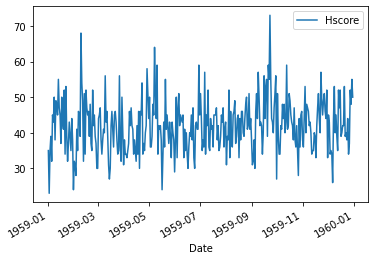

In [107]:
mh.plot()


In [108]:
smooth = mh.rolling(window=25).mean()

In [109]:
value = pd.DataFrame(series_value)
mh_Hscore= pd.concat([value,value.shift(1)],axis = 1)
mh_Hscore.columns = ['Actual_Hscore','Forecast_Hscore']
mh_test = mh_Hscore[1:]

In [110]:
mh_train = mh[:330]
mh_test = mh[330:]

In [111]:
from statsmodels.tsa.arima_model import ARIMA
arima_model= ARIMA(mh_train,order = (2,1,3))
arima_model_fit = arima_model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


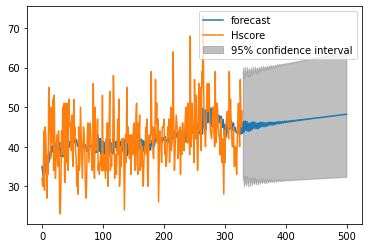

In [112]:
arima_model_fit.plot_predict(1,500)
x=arima_model_fit.forecast(steps=200)